In [1]:
#importing the necessary libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
import numpy as np
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, f1_score, confusion_matrix, accuracy_score

In [2]:
#reading in the data, including all features extracted + Participant Number + Task_Label + Classification
#Task Labels refer to the conditions in the lab, and the classification is either 0 (no speech) or 1 (speech)
df = pd.read_excel('pro_impedance_training_set.xlsx')
df

,Task_Label,Pro_insp_dur_mean,Pro_insp_dur_sd,Pro_exp_dur_mean,Pro_exp_dur_sd,Pro_insp_amp_mean,Pro_insp_amp_sd,Pro_exp_amp_mean,Pro_exp_amp_sd,Pro_insp_flow_mean,...,Pro_ie_ratio_sd,Pro_duty_cycle_mean,Pro_exp_diff_mean,Pro_RSP_Symmetry_PeakTrough,Pro_RRV_RMSSD,Pro_RSP_Rate_Mean,Pro_insp_minu_depth,Pro_exp_minu_depth,Participant,Classification
0,12.0a,1.789429,0.981967,2.005375,0.335261,1.365262,0.453330,1.308144,0.384221,0.873079,...,0.410715,0.450117,0.319571,0.522464,1824.206677,16.085184,21.960495,21.041743,10785,0
1,12.0b,1.577250,0.309334,1.830889,0.161704,1.278717,0.307188,1.405166,0.391340,0.831595,...,0.212815,0.462781,0.182625,0.537192,391.484902,17.667177,22.591318,24.825310,10785,0
2,12.0c,1.797833,0.175999,2.599857,0.521450,1.912990,0.426831,1.860063,0.333116,1.083227,...,0.112015,0.392339,0.375667,0.536281,325.361645,14.340384,27.433016,26.674024,10785,0
3,12.0d,1.635857,0.281658,2.095857,0.251297,1.088264,0.321526,1.140532,0.307385,0.661880,...,0.180558,0.444252,0.321000,0.534714,313.146611,15.633870,17.013769,17.830929,10785,0
4,12.0e,1.820600,0.141959,3.073333,1.591572,1.368212,0.166277,1.343498,0.280060,0.750592,...,0.222939,0.389224,1.866800,0.604311,2873.485775,10.764507,14.728128,14.462088,10785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,85,1.824250,0.551583,1.999375,0.147065,30.149718,3.217657,31.470600,2.670423,17.340402,...,0.376923,0.469096,0.122000,0.485652,584.235642,16.020141,483.002734,504.163440,94527,0
2498,87,1.505500,0.656451,1.910250,1.226542,22.823756,13.458317,23.521181,15.978589,14.952084,...,1.054285,0.520104,1.490429,0.561530,1986.574774,17.989214,410.581438,423.127569,94527,1
2499,89,1.706625,0.543736,2.268000,0.269661,26.132010,12.202935,28.734453,12.021318,16.090292,...,0.293774,0.428940,0.229333,0.476493,713.152041,15.266439,398.942749,438.672785,94527,0
2500,91,1.241500,0.330195,2.470125,1.135101,25.184686,24.058378,27.983025,10.014218,18.230262,...,0.269589,0.346931,0.757286,0.539446,978.508644,16.641077,419.100291,465.667670,94527,1


                Feature  Mutual_Information
3        Pro_exp_dur_sd            0.244904
15    Pro_exp_diff_mean            0.239983
17        Pro_RRV_RMSSD            0.211193
13      Pro_ie_ratio_sd            0.117330
14  Pro_duty_cycle_mean            0.115864
2      Pro_exp_dur_mean            0.086098
12    Pro_ie_ratio_mean            0.075333
9      Pro_insp_flow_sd            0.072786
1       Pro_insp_dur_sd            0.067327
18    Pro_RSP_Rate_Mean            0.063740


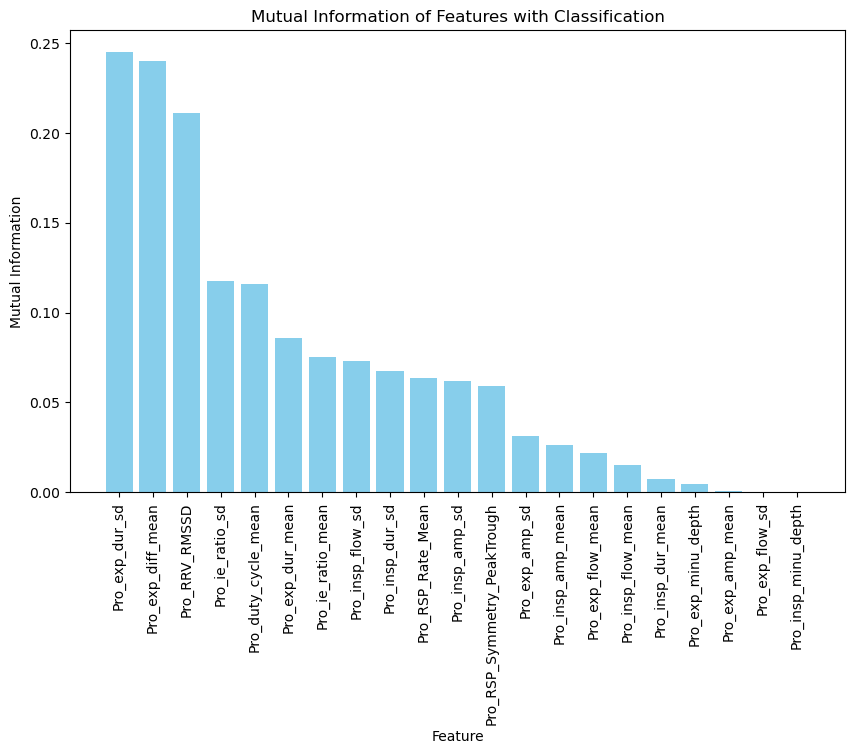

   Pro_exp_dur_sd  Pro_exp_diff_mean  Pro_RRV_RMSSD  Pro_ie_ratio_sd  \
0        0.335261           0.319571    1824.206677         0.410715   
1        0.161704           0.182625     391.484902         0.212815   
2        0.521450           0.375667     325.361645         0.112015   
3        0.251297           0.321000     313.146611         0.180558   
4        1.591572           1.866800    2873.485775         0.222939   

   Pro_duty_cycle_mean  Pro_exp_dur_mean  Pro_ie_ratio_mean  Pro_insp_flow_sd  \
0             0.450117          2.005375           0.885292          0.366389   
1             0.462781          1.830889           0.883762          0.194970   
2             0.392339          2.599857           0.652974          0.295719   
3             0.444252          2.095857           0.819468          0.155977   
4             0.389224          3.073333           0.669187          0.062505   

   Pro_insp_dur_sd  Pro_RSP_Rate_Mean Task_Label  Participant  Classification  


In [3]:
#identifying and plotting the 10 features that have the highest mutual information with the Classification
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# dropping Participant and Classification columns
df_features = df.drop(columns=['Participant', 'Classification', 'Task_Label'])

A = df_features #defining the features to test
b = df['Classification'] #defining the target

# calculating mutual information
mutual_info = mutual_info_classif(A, b)

# making a dataframe to store feature names along with their mutual information statistic
feature_mi_df = pd.DataFrame({'Feature': A.columns, 'Mutual_Information': mutual_info})

# sort features by mutual information in descending order
feature_mi_df = feature_mi_df.sort_values(by='Mutual_Information', ascending=False)

# print the top 10 features
print(feature_mi_df.head(10))

# plot a histogram of the mutual information
plt.figure(figsize=(10, 6))
plt.bar(feature_mi_df['Feature'], feature_mi_df['Mutual_Information'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information of Features with Classification')
plt.xticks(rotation=90)
plt.show()

# putting the top 10 features into a new variable
top_features = feature_mi_df['Feature'][:10].tolist()

# defining the columns to keep (we add the task_label, participant, classification as they will be used
#in the nested cross-validation)
columns_to_keep = top_features + ['Task_Label', 'Participant', 'Classification']

# filtering the dataframe to only keep the columns we want
df = df[columns_to_keep]

# Print the filtered DataFrame
print(df.head())


In [5]:
writer = pd.ExcelWriter('pro_impedance_training_set_10_final.xlsx', engine = 'xlsxwriter')

df.to_excel(writer, index = False, float_format = '%.7f', sheet_name = 'Sheet1')

writer.save()

/var/folders/hp/bbc0951x6v16lx1z1dcbzqtm0000gn/T/ipykernel_50433/1779259931.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
